In [1]:
import torchvision
import torch
from torch import nn,optim
from torchvision import datasets,transforms

from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [2]:
batch_size=12

train_data = datasets.MNIST('D:\datasets', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('D:\datasets', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

In [34]:
z1=0
a1=0
z2=0
a2=0
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64,self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self,x):
        z1 = self.fc1(x.view(-1, self.in_dim))
        a1 = self.relu(z1)
        z2 = self.fc2(a1)
        a2 = self.relu(z2)
        a3 = self.relu(self.fc3(a2))
        a4 = self.relu(self.fc4(a3))
        logit = self.fc5(a4)
        z1 = z1
        a1 = a1
        z2 = z2
        a2 = a2
        return logit

In [35]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.101
[1,  4000] loss: 0.643
[2,  2000] loss: 0.317
[2,  4000] loss: 0.237
[3,  2000] loss: 0.165


In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

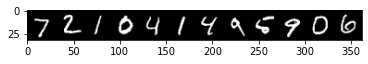

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6
Prediction
    7   2   1   0   4   1   4   3   5   9   0   6


In [7]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs = model(images)
_,predicted = torch.max(outputs,1)
print("Prediction")
print("  "+' '.join('%3s' % label.item() for label in predicted))

In [28]:
X = train_data.data.view(-1,784) / 255.0
X = X.numpy()
y = train_data.targets
y = y.numpy()
print(z1)
print(X)
print(y)
print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')

AttributeError: 'function' object has no attribute 'z1'

In [9]:
feat_cols = [f'pixel{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [10]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
print(rndperm)

[12628 37730 39991 ...   860 15795 56422]


<Figure size 432x288 with 0 Axes>

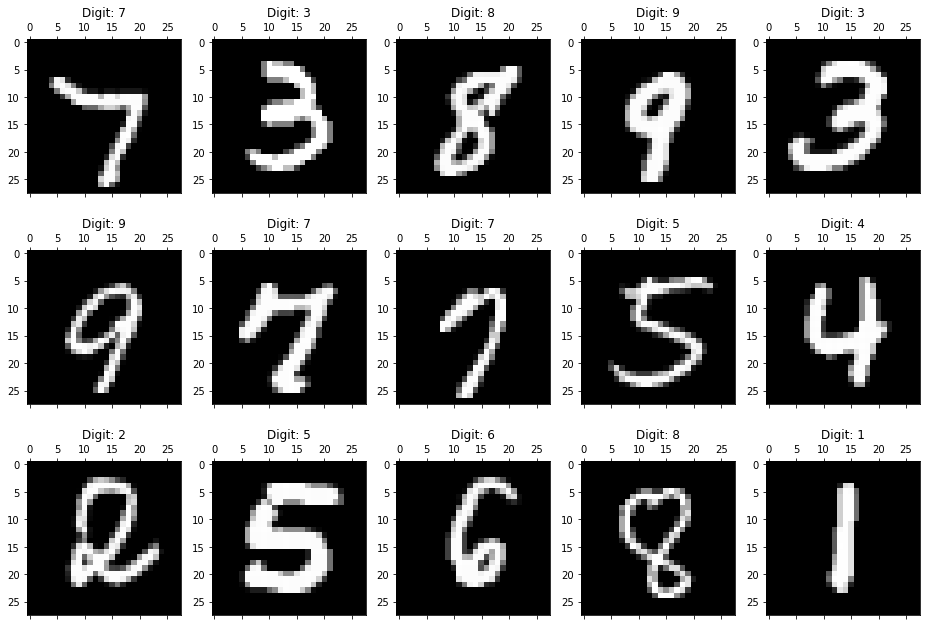

In [11]:
plt.gray()
fig = plt.figure(figsize=(16,11))
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])))
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))

In [12]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09704707 0.07095962]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

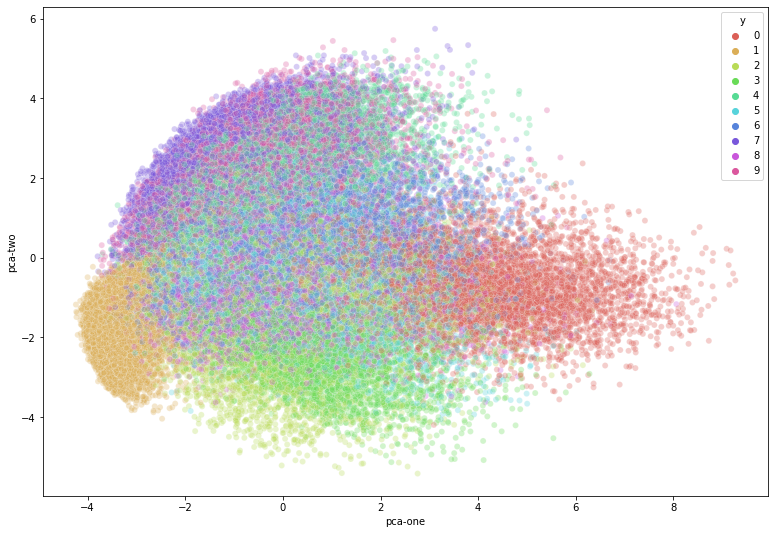

In [13]:
plt.figure(figsize=(13,9))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls",10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [14]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09614986 0.07138541]


In [15]:
time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 2.922s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.891624
[t-SNE] KL divergence after 300 iterations: 2.818283
t-SNE done! Time elapsed:

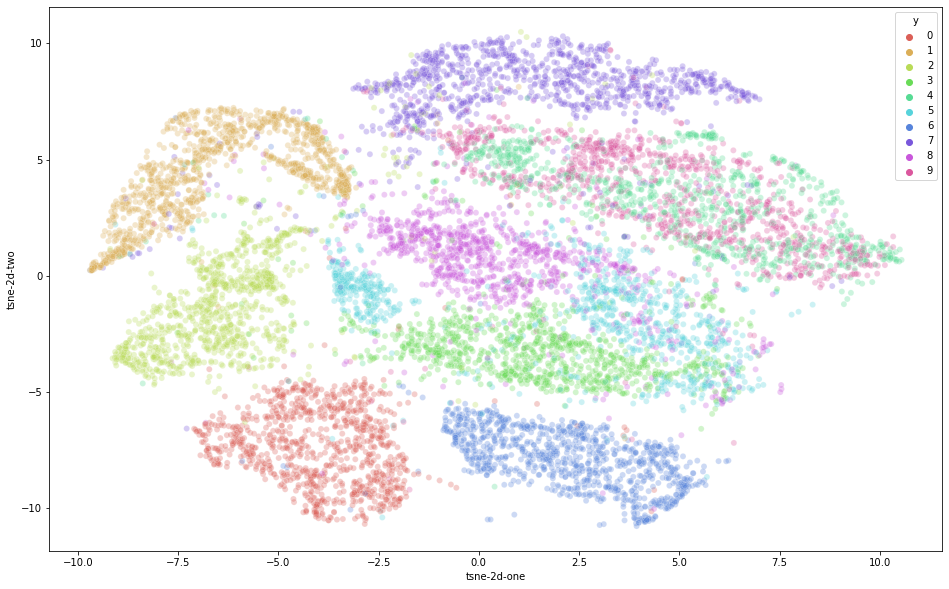

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls",10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()